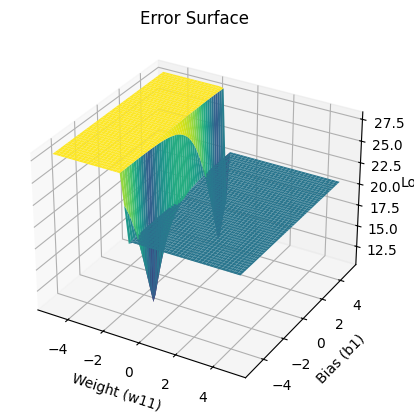

Layer 0: Loss = 20.577748631067788
Layer 500: Loss = 20.289140885409918
Layer 1000: Loss = 18.332968557117848
Layer 1500: Loss = 18.33293704309216
Final Result is: [82.00318086 20.00491162 11.99951259]


In [28]:
"""
Original linear model: y = b + wx (Too simple to use)
Sigmoid function model: Suppose we have three sigmoid function

"""
# Viewers for previous three days: X = [25, 20, 21]
# There are weight for no. of sigmoid and no. of features. So Wij represents weight for xj for i-th sigmoid
# Bias: different bias for different functions

"""
r1 = b1 + w11x1 + w12x2 + w13x3
r2 = b2 + w21x1 + w22x2 + w23x3
r3 = b3 + w31x1 + w32x2 + w33x3

Where 
result vector: R = [r1, r2, r3]
weight matrix W = [[w11, w12, w13], [w21, w22, w23], [w31, w32, w33]]
input vector X = [x1, x2, x3]
bias vector B = [b1, b2, b3]
"""

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#### --------------------------------------- Define Model -------------------------------------- ####
# Define the sigmoid function
def sigmoid(r):
    return 1 / (1 + np.exp(-r))

# Set a random seed for reproducibility
np.random.seed(42)

# Define the input vector
original_x = np.array([33, 28, 32])

def model(X, W, B, C, B2):
    # Compute the result
    R = np.dot(W, X) + B

    # Apply the sigmoid function to each element of R
    sigmoid_R = sigmoid(R)

    # Scale by coefficients
    sigmoid_R_scaled = C * sigmoid_R

    # Compute the final output
    Y = B2 + sigmoid_R_scaled
    
    return Y

def loss_function(real_values: list, predict_values: list):
    real = np.array(real_values)
    predict = np.array(predict_values)

    # Compute the absolute errors
    absolute_errors = np.abs(real - predict)

    # Sum the absolute errors
    total_error = np.sum(absolute_errors)
    
    # Calculate MAE by dividing by the number of items
    mae = total_error / len(real)

    return mae


def deep_learn(original_data, layers, learning_rate=0.01, epsilon=1e-8):
    real_watch = np.array([53, 46, 12])
    
    # Initialize weights, biases, and coefficients
    W = 2 * np.random.rand(3, 3) - 1
    B = 50 + 10 * np.random.rand(3)
    C = np.random.rand(3) * 100 + 0.5
    B2 = 0.1 * np.random.rand(3)
    
    # Initialize accumulators for squared gradients (Adagrad)
    accum_W = np.zeros_like(W)
    accum_B = np.zeros_like(B)
    accum_C = np.zeros_like(C)
    accum_B2 = np.zeros_like(B2)
    
    def compute_loss(W_value, B_value):
        W_temp = np.copy(W)
        B_temp = np.copy(B)
        
        # Update the parameters
        W_temp[0, 0] = W_value  # Change the first weight
        B_temp[0] = B_value     # Change the first bias
        
        output = model(original_x, W_temp, B_temp, C, B2)
        loss = loss_function(real_watch, output)
        
        return loss

    def draw_error_surface():
        # Define a grid of values for weights and biases
        W_range = np.linspace(-5, 5, 50)  # Range for weights
        B_range = np.linspace(-5, 5, 50)  # Range for biases
        W_mesh, B_mesh = np.meshgrid(W_range, B_range)

        # Calculate the loss for each combination of weights and biases
        loss_surface = np.zeros(W_mesh.shape)
        for i in range(W_mesh.shape[0]):
            for j in range(W_mesh.shape[1]):
                loss_surface[i, j] = compute_loss(W_mesh[i, j], B_mesh[i, j])
        
        # Plotting
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(W_mesh, B_mesh, loss_surface, cmap='viridis')

        ax.set_xlabel('Weight (w11)')
        ax.set_ylabel('Bias (b1)')
        ax.set_zlabel('Loss')
        ax.set_title('Error Surface')
        
        plt.show()
    
    # Draw the error surface
    draw_error_surface()
    
    for layer in range(layers):
        # Compute output
        output = model(original_data, W, B, C, B2)
        
        # Compute the loss
        loss = loss_function(real_watch, output)

        # Compute gradients
        error = output - real_watch  # (predicted - actual)
        d_sigmoid = sigmoid(output) * (1 - sigmoid(output))  # derivative of sigmoid

        # Gradients
        dC = sigmoid(output)
        dB2 = np.ones_like(B2)
        dW = np.outer(error * d_sigmoid, original_data)  # gradients for W
        dB = error * d_sigmoid  # gradients for B

        # Accumulate the squared gradients
        accum_W += dW ** 2
        accum_B += dB ** 2
        accum_C += dC ** 2
        accum_B2 += dB2 ** 2

        # Check if the gradient is close to zero
        gradient_norm = np.linalg.norm(
            np.concatenate([dW.flatten(), dB.flatten(), dC.flatten(), dB2.flatten()])
        )
        if gradient_norm < 1:
            print(f"Gradient is close to zero: {gradient_norm}")
        
        # Update parameters using Adagrad
        W -= (learning_rate / (np.sqrt(accum_W) + epsilon)) * dW
        B -= (learning_rate / (np.sqrt(accum_B) + epsilon)) * dB
        C -= (learning_rate / (np.sqrt(accum_C) + epsilon)) * dC
        B2 -= (learning_rate / (np.sqrt(accum_B2) + epsilon)) * dB2
        
        if layer % 500 == 0:  # Print loss every 5 layers
            print(f"Layer {layer}: Loss = {loss}")
    

    return output



# Execute the training
final_output = deep_learn(original_x, layers=2000, learning_rate=0.01)
print("Final Result is:", final_output)

In [20]:

"""
Without optimizing learning rate
"""
#### --------------------------------------- Define Model -------------------------------------- ####
# Define the sigmoid function
import numpy as np

def sigmoid(r):
    return 1 / (1 + np.exp(-r))

# Set a random seed for reproducibility
np.random.seed(42)

# Define the input vector
original_x = np.array([33, 28, 32])

def model(X, W, B, C, B2):
    # Compute the result
    R = np.dot(W, X) + B

    # Apply the sigmoid function to each element of R
    sigmoid_R = sigmoid(R)

    # Scale by coefficients
    sigmoid_R_scaled = C * sigmoid_R

    # Compute the final output
    Y = B2 + sigmoid_R_scaled
    
    return Y

def deep_learn(original_data, layers, learning_rate=0.01):
    # Initialize weights, biases, and coefficients
    W = 2 * np.random.rand(3, 3) - 1
    B = 50 + 10 * np.random.rand(3)
    C = np.random.rand(3) * 100 + 0.5
    B2 = 0.1 * np.random.rand(3)
    
    for layer in range(layers):
        # Compute output
        output = model(original_data, W, B, C, B2)
        
        # Assume the watched amount for next day is [53, 46, 12]
        real_watch = np.array([53, 46, 12])
        
        # Compute the loss
        loss = loss_function(real_watch, output)

        # Compute gradients
        error = output - real_watch  # (predicted - actual)
        d_sigmoid = sigmoid(output) * (1 - sigmoid(output))  # derivative of sigmoid

        # Gradients
        dC = sigmoid(output)
        dB2 = np.ones_like(B2)
        dW = np.outer(error * d_sigmoid, original_data)  # gradients for W
        dB = error * d_sigmoid  # gradients for B

        # Check if the gradient is close to zero
        gradient_norm = np.linalg.norm(
            np.concatenate([dW.flatten(), dB.flatten(), dC.flatten(), dB2.flatten()])
        )
        if gradient_norm < 1:
            print(f"Gradient is close to zero: {gradient_norm}")
        
        # If the gradient norm is samll, it indicates you may be at a critical point(minimum, maximum or saddle point)

    
        # Update parameters, and use "Adagrad to update learning rate"
        W -= learning_rate * dW
        B -= learning_rate * dB
        C -= learning_rate * dC
        B2 -= learning_rate * dB2
        
        if layer % 100 == 0:  # Print loss every 50 layers
            print(f"Layer {layer}: Loss = {loss}")
        
    return output

def loss_function(real_values: list, predict_values: list):
    real = np.array(real_values)
    predict = np.array(predict_values)

    # Compute the absolute errors
    absolute_errors = np.abs(real - predict)

    # Sum the absolute errors
    total_error = np.sum(absolute_errors)
    
    # Calculate MAE by dividing by the number of items
    mae = total_error / len(real)

    return mae

# Execute the training
final_output = deep_learn(original_x, layers=1000, learning_rate=0.01)
print("Final Result is:", final_output)

Layer 0: Loss = 20.577748631067788
Layer 100: Loss = 19.91108190581274
Layer 200: Loss = 19.24441522663295
Layer 300: Loss = 18.577748887833238
Layer 400: Loss = 18.754429640342362
Layer 500: Loss = 19.42107189669933
Layer 600: Loss = 20.08756024674619
Layer 700: Loss = 20.752922388226636
Layer 800: Loss = 21.41035483144414
Layer 900: Loss = 22.02371792598694
Final Result is: [63.78260453  1.8586894  -0.60085796]
